In [1]:
library(sna)
library(NetData)
data(studentnets.mrqap173, package="NetData")

Loading required package: statnet.common


Attaching package: 'statnet.common'


The following object is masked from 'package:base':

    order


Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


sna: Tools for Social Network Analysis
Version 2.6 created on 2020-10-5.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




In [4]:
?m173_sem1_FRN

mrqap173 {NetData},R Documentation


In [7]:
head(m173_sem1_RCE, 3)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26
1,0,1,1,0,0,0,0,1,1,⋯,0,0,1,1,1,1,1,1,1,1
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1,1,⋯,0,0,1,1,1,1,1,1,1,1


In [5]:
m173_sem1_SSL <- as.matrix(m173_sem1_SSL)
m173_sem1_TSL <- as.matrix(m173_sem1_TSL)
m173_sem1_FRN <- as.matrix(m173_sem1_FRN)
m173_sem1_SEAT <- as.matrix(m173_sem1_SEAT)
m173_sem1_RCE <- as.matrix(m173_sem1_RCE)
m173_sem1_GND <- as.matrix(m173_sem1_GND)


m173_sem2_SSL <- as.matrix(m173_sem2_SSL)
m173_sem2_TSL <- as.matrix(m173_sem2_TSL)

In [8]:
predictor_matrices <- array(dim = c(6, length(m173_sem1_SSL[1,]),length(m173_sem1_SSL[1,])))

predictor_matrices[1,,] <- m173_sem1_SSL
predictor_matrices[2,,] <- m173_sem1_TSL
predictor_matrices[3,,] <- m173_sem1_FRN
predictor_matrices[4,,] <- m173_sem1_SEAT
predictor_matrices[5,,] <- m173_sem1_RCE
predictor_matrices[6,,] <- m173_sem1_GND

In [10]:
nl<-netlm(m173_sem2_SSL, predictor_matrices)
nlLabeled <- list()
nlLabeled <- summary(nl)
nlLabeled$names <- c("Intercept", "SSL1", "TSL1", "Friends", "Seat","Race","Gender")
nlLabeled$coefficients = round(nlLabeled$coefficients, 2)
nlLabeled


OLS Network Model

Residuals:
          0%          25%          50%          75%         100% 
-1.652583881 -0.067206384  0.008678721  0.015216870  2.924942741 

Coefficients:
          Estimate Pr(<=b) Pr(>=b) Pr(>=|b|)
Intercept -0.02    0.365   0.635   0.594    
SSL1       0.45    1.000   0.000   0.000    
TSL1       0.03    0.964   0.036   0.041    
Friends    0.16    0.999   0.001   0.001    
Seat       0.08    0.995   0.005   0.005    
Race       0.00    0.461   0.539   0.907    
Gender     0.01    0.592   0.408   0.866    

Residual standard error: 0.3437 on 643 degrees of freedom
Multiple R-squared: 0.3817 	Adjusted R-squared: 0.3759 
F-statistic: 66.16 on 6 and 643 degrees of freedom, p-value:     0 


Test Diagnostics:

	Null Hypothesis: qap 
	Replications: 1000 
	Coefficient Distribution Summary:

       Intercept      SSL1      TSL1   Friends      Seat      Race    Gender
Min    -4.828317 -2.982208 -5.895621 -3.625474 -3.560777 -4.370630 -4.719824
1stQ   -1.192650 -0.7883

In [11]:
n2<-netlm(m173_sem2_TSL, predictor_matrices)

n2Labeled <- list()
n2Labeled <- summary(n2)
n2Labeled$names <- c("Intercept", "SSL1", "TSL1", "Friends", "Seat","Race","Gender")

n2Labeled$coefficients = round(n2Labeled$coefficients, 2)
n2Labeled


OLS Network Model

Residuals:
         0%         25%         50%         75%        100% 
-6.79570345 -0.10044585 -0.00923077  0.02628499  7.90740702 

Coefficients:
          Estimate Pr(<=b) Pr(>=b) Pr(>=|b|)
Intercept  0.10    0.807   0.193   0.224    
SSL1      -0.28    0.005   0.995   0.023    
TSL1       1.01    1.000   0.000   0.000    
Friends    0.01    0.580   0.420   0.902    
Seat      -0.14    0.014   0.986   0.030    
Race      -0.04    0.429   0.571   0.764    
Gender    -0.09    0.161   0.839   0.311    

Residual standard error: 0.8241 on 643 degrees of freedom
Multiple R-squared: 0.756 	Adjusted R-squared: 0.7538 
F-statistic: 332.1 on 6 and 643 degrees of freedom, p-value:     0 


Test Diagnostics:

	Null Hypothesis: qap 
	Replications: 1000 
	Coefficient Distribution Summary:

       Intercept      SSL1      TSL1   Friends      Seat      Race    Gender
Min    -3.548753 -5.001627 -2.227515 -3.794071 -4.419602 -3.928482 -3.597771
1stQ   -0.144148 -0.721703 -1.00084

In [12]:
crr.app = qaptest(list(m173_sem2_SSL, predictor_matrices), gcor, g1=1, g2=2, reps = 1000)

In [13]:
crr.app


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 


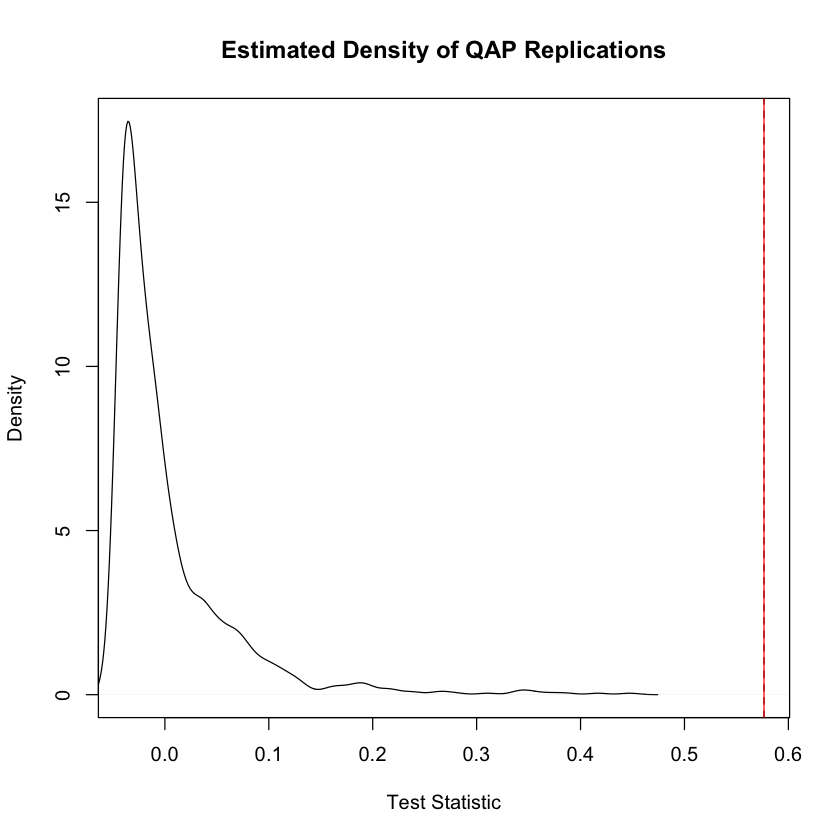

In [31]:
par(bg = 'white')
plot(
    crr.app, 
    xlim = c(min(min(crr.app$dist), crr.app$testval), max(max(crr.app$dist), crr.app$testval))
)
abline(v = crr.app$testval, col='red')

In [20]:
summary(crr.app)


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 

Test Diagnostics:
	Test Value (f(d)): 0.5765384 
	Replications: 1000 
	Distribution Summary:
		Min:	 -0.03935144 
		1stQ:	 -0.03935144 
		Med:	 -0.0203425 
		Mean:	 0.00251386 
		3rdQ:	 0.01387361 
		Max:	 0.4472776 
